
# **Introduction**

Machine learning has become a critical tool in solving real-world problems across diverse domains, enabling systems to make intelligent decisions based on data. While the implementation of machine learning models often takes center stage, their success is fundamentally tied to the mathematical principles that govern their behavior, performance, and interpretability.

This report takes a structured approach to bridge theoretical mathematics with practical machine learning. Beginning with a real-world dataset, the process starts with Exploratory Data Analysis (EDA) and Feature Engineering, showcasing how raw data can be transformed into meaningful inputs for modeling. These steps emphasize the importance of understanding data distributions, detecting patterns, and engineering features that enhance model performance.

Following the data preparation phase, the report provides **a** theoretical explanation of key machine learning algorithms, encompassing both regression and classification problems. Algorithms such as linear regression, logistic regression, and decision trees are explored in detail, with a focus on their underlying mathematical concepts. Core topics include linear algebra, calculus, probability, and optimization techniques, which are critical to understanding how these models learn, predict, and generalize.

The report concludes by integrating theoretical insights with practical implementation, demonstrating how machine learning models operate in practice. This comprehensive approach provides a clear understanding of how mathematics drives the functionality and efficiency of machine learning algorithms, empowering readers to appreciate the synergy between theoretical rigor and real-world application.


# **Introduction to the Titanic Dataset**
The Titanic - Machine Learning from Disaster dataset is one of the most well-known datasets in the field of data science and machine learning. It is based on the tragic sinking of the RMS Titanic, a passenger ship that struck an iceberg and sank on April 15, 1912. This dataset provides a fascinating real-world problem: predicting the survival of passengers based on several attributes.
The task is to predict whether a passenger survived (1) or did not survive (0) the Titanic disaster, given information about their demographic and travel details. This is a binary classification problem, making it suitable for applying and analyzing various machine learning algorithms.

**Key Features of the Dataset:**

PassengerId: Unique identifier for each passenger.

Survived: Binary target variable (1 = survived, 0 = did not survive).

Pclass: Ticket class (1st, 2nd, or 3rd class).

Name: Passenger's name.

Sex: Gender of the passenger.

Age: Passenger's age (some values are missing).

SibSp: Number of siblings/spouses aboard.

Parch: Number of parents/children aboard.

Ticket: Ticket number (categorical, may contain duplicates).

Fare: Price of the ticket.

Cabin: Cabin number (many missing values).

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#
file_path = '/content/train.csv'
df = pd.read_csv(file_path)


print( df.describe(include="all"))
df.head()


        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **EDA**

In [ ]:
missing_values = df.isnull().sum().sort_values(ascending=False)

missing_values

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [ ]:

df['Cabin_'] = df['Cabin'].notnull().astype(int)
df = df.drop(columns=['Cabin'])





To impute missing values in the Age column using the median age, grouped by both Pclass and Sex.

To impute missing values in the Embarked column using the mode (most frequent value) of the Embarked column.


In [ ]:

df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.112424    0.523008   
std     257.353842    0.486592    0.836071   13.304424    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.500000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.500000    1.000000    3.000000   36.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare      Cabin_  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.228956  
std      0.806057   49.693429    0.420397  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   31.000000    0.000000  
max      6.000000

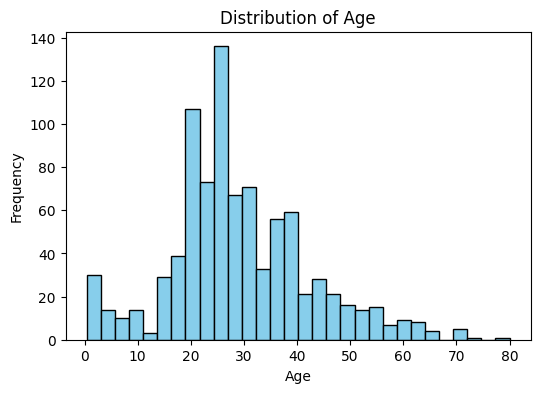

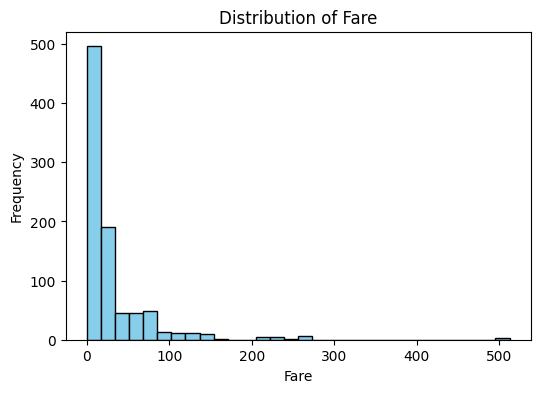

<ipython-input-6-dd4f2af0f3ad>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='pastel')


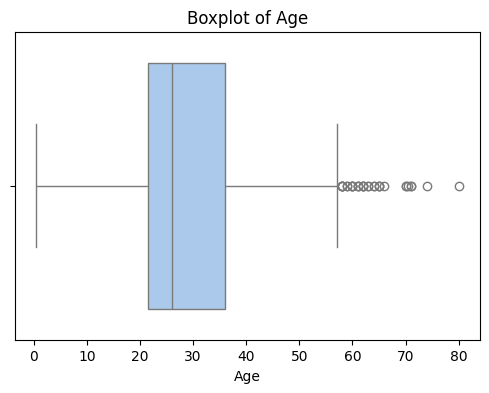

<ipython-input-6-dd4f2af0f3ad>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='pastel')


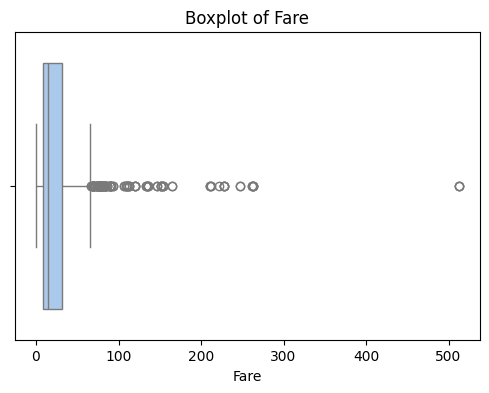

In [ ]:
# Summary statistics for numerical columns
print(df.describe())


import matplotlib.pyplot as plt
numerical_features = ['Age', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots to check for outliers
import seaborn as sns
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=feature, palette='pastel')
    plt.title(f'Boxplot of {feature}')
    plt.show()


Removing Outliers in the Dataset

In [ ]:

def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

    return df


numerical_features = ['Age', 'Fare']

df = remove_outliers(df, numerical_features)


<ipython-input-8-9cd47e32ee04>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='pastel')


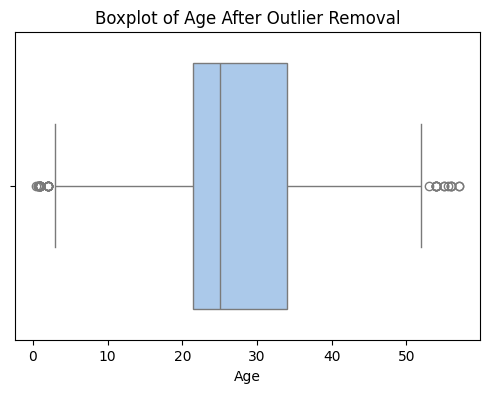

<ipython-input-8-9cd47e32ee04>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='pastel')


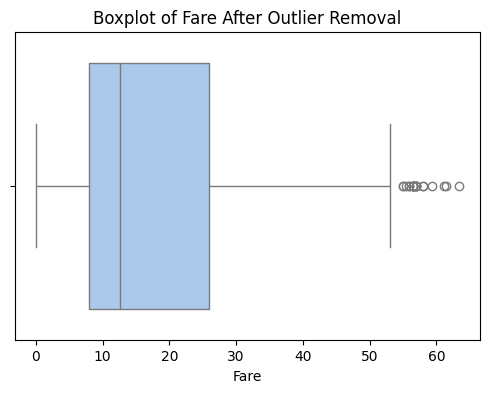

In [ ]:
# Recheck for outliers using boxplots
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=feature, palette='pastel')
    plt.title(f'Boxplot of {feature} After Outlier Removal')
    plt.xlabel(feature)
    plt.show()


 **FEATURE ENGINEERING**

 In the feature engineering process, the FamilySize feature is created by adding the number of siblings/spouses (SibSp) and the number of parents/children (Parch) for each passenger, plus 1 to account for the passenger themselves. Based on this, the IsAlone feature is derived, indicating whether the passenger was traveling alone (1 if alone, 0 if not).

Titles from the Name column are extracted and mapped to categories such as Mr, Mrs, Miss, and Master, with all other titles grouped into the Other category. The Age feature is then binned into categories such as Child, Teen, Young Adult, Adult, and Senior to create the AgeBin feature, while the Fare feature is binned into quantile categories (Low, Medium, High, Very High) to represent different fare brackets.

These categorical features, along with Sex, Embarked, Title, AgeBin, and FareBin, are one-hot encoded to convert them into binary columns, avoiding multicollinearity by dropping the first category in each feature. Finally, irrelevant columns such as PassengerId, Name, and Ticket are dropped as they don't provide meaningful information for prediction.

In [ ]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [ ]:
# Feature Engineering

df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].map({
    'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master',
    'Dr': 'Other', 'Rev': 'Other', 'Col': 'Other', 'Major': 'Other',
    'Mlle': 'Miss', 'Countess': 'Other', 'Ms': 'Miss', 'Lady': 'Other',
    'Jonkheer': 'Other', 'Don': 'Other', 'Mme': 'Mrs', 'Capt': 'Other',
    'Sir': 'Other'
})
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'AgeBin', 'FareBin'], drop_first=True)
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])



In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_,FamilySize,IsAlone,Sex_male,...,Title_Mr,Title_Mrs,Title_Other,AgeBin_Teen,AgeBin_Young Adult,AgeBin_Adult,AgeBin_Senior,FareBin_Medium,FareBin_High,FareBin_Very High
0,0,3,22.0,1,0,7.2500,0,2,0,True,...,True,False,False,False,True,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,0,1,1,False,...,False,False,False,False,True,False,False,True,False,False
3,1,1,35.0,1,0,53.1000,1,2,0,False,...,False,True,False,False,True,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,0,1,1,True,...,True,False,False,False,True,False,False,True,False,False
5,0,3,25.0,0,0,8.4583,0,1,1,True,...,True,False,False,False,True,False,False,True,False,False




## **Random Forest Algorithm:**

### **1. Introduction to Random Forest**
Random Forest is an ensemble learning method used for both classification and regression tasks. It builds multiple decision trees, each trained on a different subset of the data, and combines their predictions to improve the overall accuracy of the model. The power of Random Forest comes from reducing variance (overfitting) through aggregation and random feature selection.

### **2. Key Concepts**

#### **2.1. Ensemble Learning**
- Ensemble learning combines multiple individual models to create a stronger overall model. In Random Forest, multiple decision trees are trained, and their predictions are aggregated to improve accuracy.
  
#### **2.2. Bootstrap Aggregating (Bagging)**
- Bagging is the process of generating multiple training datasets by randomly sampling from the original dataset **with replacement**. Each of these datasets is used to train an individual decision tree. This process ensures diversity among the trees, making the ensemble more robust.

### **3. Mathematical Process Behind Random Forest**

#### **3.1. Bootstrap Sampling**
Given a dataset \( D = \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\} \), where \( x_i \) are feature vectors and \( y_i \) are corresponding labels, the Random Forest generates \( B \) bootstrap datasets \( D_1, D_2, ..., D_B \), where each dataset is formed by randomly selecting \( n \) samples (with replacement) from \( D \).

Each dataset \( D_b \) may have duplicate samples due to the nature of bootstrap sampling.

#### **3.2. Building Decision Trees**
For each bootstrap sample \( D_b \), a decision tree \( T_b \) is built. When splitting a node, instead of considering all the features, Random Forest randomly selects a subset of \( m \) features at each node (usually \( m = \sqrt{p} \), where \( p \) is the total number of features). This random feature selection decorrelates the trees, leading to better generalization.

The decision tree construction involves selecting the feature and split that minimizes impurity at each node. The two most commonly used impurity measures are:

- **Gini Impurity (for classification):**

  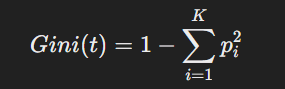

  where \( p_i \) is the probability of class \( i \) at node \( t \), and \( K \) is the number of classes.

- **Entropy (for classification):**

    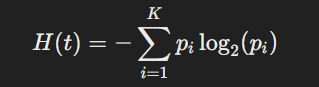

  where \( p_i \) is the probability of class \( i \) at node \( t \).

For regression, **Mean Squared Error (MSE)** is often used to split nodes:

   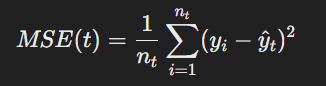


where \( n_t \) is the number of samples at node \( t \), \( y_i \) are the target values, and \( \hat{y}_t \) is the predicted value at node \( t \).

#### **3.3. Making Predictions**
Once all \( B \) trees are built, the final prediction is made by aggregating the predictions of the individual trees:

- **For classification:** The final prediction is the **majority vote** among the trees:

   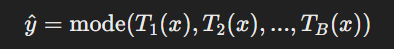


  where \( T_b(x) \) is the output of tree \( T_b \) for the input \( x \).

- **For regression:** The final prediction is the **average** of the predictions from all trees:

  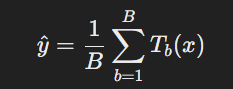


### **4. Model Evaluation**
Random Forest uses various metrics to evaluate model performance. For classification tasks, common metrics include **accuracy**, **precision**, **recall**, and **F1-score**. For regression tasks, common metrics include **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)**.

### **5. Feature Importance**
One of the key advantages of Random Forest is that it provides a measure of feature importance. This can be calculated by measuring how much each feature reduces the impurity (Gini or Entropy) or MSE across all trees. A higher reduction indicates more importance of that feature.

The feature importance for feature \( f \) is calculated as the total decrease in node impurity (weighted by the probability of reaching that node) that is attributed to feature \( f \).

### **6. Mathematical Summary of Random Forest**

- **Ensemble Prediction:**
  The overall prediction for an input \( x \) is:

 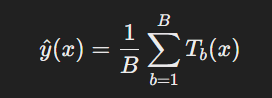

  (for regression), or

  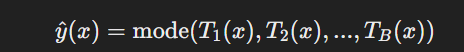

  (for classification).

- **Feature Importance:**
  Feature importance is computed as the total decrease in impurity or MSE across all trees, normalized by the number of samples that reach each node.

### **7. Advantages of Random Forest**

- **Reduces Overfitting:** By averaging the results of many decision trees, Random Forest reduces the risk of overfitting to the training data.
- **Robustness to Outliers:** The model is less sensitive to noise and outliers because it relies on the aggregation of multiple decision trees.
- **Works Well with High-Dimensional Data:** It can handle large datasets with many features effectively.
- **Feature Importance:** Random Forest can provide valuable insights into which features are most important for making predictions.

Random Forest is a powerful machine learning algorithm that combines the simplicity of decision trees with the strength of ensemble learning. The mathematical foundation behind Random Forest ensures it is a robust and accurate model for both classification and regression tasks. By reducing variance and avoiding overfitting, it performs well in a wide range of applications.


# **1. Data Splitting**
Before training the model, split the dataset into training and test sets. This ensures that the model is evaluated on unseen data. Typically, we use 80-20 or 70-30 splits.

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Survived'])  # Drop the target variable 'Survived'
y = df['Survived']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# IMPLEMENTATION OF RANDOM FOREST ALGORITHM
## Methodology
The custom Random Forest implementation consists of two main components:
1. **DecisionTree Class**: Implements an individual decision tree using recursive binary splitting.
2. **RandomForest Class**: Trains multiple decision trees using bootstrapped datasets and aggregates their predictions via majority voting.

### 1. Decision Tree Construction
Each decision tree follows a top-down recursive approach to split the dataset into two homogeneous subsets. The split is determined based on Gini impurity. The tree continues splitting until it reaches a stopping condition:
- The maximum depth is reached.
- The minimum number of samples for a split is not met.
- The leaf node is pure (contains only one class).

### 2. Bootstrapping and Feature Selection
Random Forest creates each decision tree on a different subset of training data using **bootstrap sampling**, where samples are selected randomly with replacement. Additionally, to ensure diversity among trees, a random subset of features is chosen at each split.

### 3. Prediction Mechanism
For classification, each decision tree predicts an output, and the final result is determined using **majority voting** among all trees.

---

## Code Explanation
### 1. Decision Tree Implementation
#### Initialization (`__init__` method):
```python
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.tree_structure = None
```
- `max_depth`: Controls the maximum depth of the tree.
- `min_samples_split`: The minimum number of samples required to split a node.
- `min_samples_leaf`: The minimum number of samples required in a leaf node.
- `max_features`: The number of features to consider for finding the best split.

#### Training the Decision Tree (`train` method):
```python
def train(self, features, labels):
    self.num_classes = len(np.unique(labels))
    self.num_features = features.shape[1]
```
- Stores the number of unique classes and features.
- Determines the `max_features` based on the square root (`sqrt`) or logarithm (`log2`) of the total features.
- Calls `_construct_tree()` to build the decision tree.

#### Constructing the Tree (`_construct_tree` method):
```python
selected_features = np.random.choice(self.num_features, self.max_features, replace=False)
```
- A random subset of features is selected at each split.

```python
best_feature, best_split_value, best_impurity = None, None, float('inf')
```
- Initializes variables to track the best feature and best split based on impurity (Gini index).

```python
split_candidates = (unique_values[:-1] + unique_values[1:]) / 2
```
- Finds the midpoints of unique feature values as potential split points.

```python
left_indices = features[:, best_feature] <= best_split_value
right_indices = ~left_indices
```
- Splits the dataset based on the best feature and value.

If a split is not found, a leaf node is created:
```python
return self._create_leaf(labels)
```
- The most common class is assigned to the leaf node.

#### Impurity Calculation (`_calculate_impurity` method):
```python
def _calculate_impurity(self, left_labels, right_labels):
    gini_left = 1.0 - sum((np.sum(left_labels == c) / num_left) ** 2 for c in np.unique(left_labels))
    gini_right = 1.0 - sum((np.sum(right_labels == c) / num_right) ** 2 for c in np.unique(right_labels))
```
- Computes the Gini impurity for left and right child nodes.
- The weighted sum of both impurities is returned as the final impurity measure.

#### Making Predictions (`predict` method):
```python
def _predict_single_sample(self, sample, node):
    if node.get('is_leaf', False):
        return node['predicted_class']
    if sample[node['feature']] <= node['split_value']:
        return self._predict_single_sample(sample, node['left'])
    else:
        return self._predict_single_sample(sample, node['right'])
```
- Recursively traverses the tree to reach a leaf node and return the predicted class.

---

### 2. Random Forest Implementation
#### Initialization (`__init__` method):
```python
class RandomForest:
    def __init__(self, num_trees=100, max_features='sqrt', min_samples_split=2, min_samples_leaf=1):
        self.num_trees = num_trees
        self.max_features = max_features
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.trees = []
```
- `num_trees`: Number of decision trees in the forest.
- `max_features`: Number of features to consider per split.
- `min_samples_split` and `min_samples_leaf`: Passed to individual decision trees.

#### Training (`train` method):
```python
def train(self, features, labels):
    self.trees = []
    for _ in range(self.num_trees):
        bootstrap_indices = np.random.choice(num_samples, num_samples, replace=True)
        bootstrap_features = features[bootstrap_indices]
        bootstrap_labels = labels[bootstrap_indices]

        tree = DecisionTree(
            max_features=self.max_features,
            min_samples_split=self.min_samples_split,
            min_samples_leaf=self.min_samples_leaf
        )
        tree.train(bootstrap_features, bootstrap_labels)
        self.trees.append(tree)
```
- Performs **bootstrap sampling** to create different training sets for each tree.
- Trains a new `DecisionTree` on each bootstrap sample.

#### Prediction (`predict` method):
```python
def predict(self, features):
    predictions = np.array([tree.predict(features) for tree in self.trees])
    return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions.astype(int))
```
- Collects predictions from all trees.
- Uses **majority voting** to determine the final prediction.


## Conclusion
This custom Random Forest implementation effectively demonstrates:
1. **Decision Tree Training**: Recursive tree-building with Gini impurity-based splits.
2. **Bootstrap Aggregation**: Each tree is trained on a different sample for robustness.
3. **Feature Randomization**: Random feature selection ensures model diversity.
4. **Ensemble Voting**: Aggregating predictions reduces variance and improves generalization.


# **2. Initialize and Train Random Forest Model**
You can initialize the Random Forest model and train it using the RandomForestClassifier (for classification tasks) from sklearn.ensemble

In [ ]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.tree_structure = None

    def train(self, features, labels):
        self.num_classes = len(np.unique(labels))
        self.num_features = features.shape[1]

        # Ensure max_features does not exceed the number of features
        if self.max_features is None:
            self.max_features = self.num_features
        elif isinstance(self.max_features, str):
            if self.max_features == 'sqrt':
                self.max_features = int(np.sqrt(self.num_features))
            elif self.max_features == 'log2':
                self.max_features = int(np.log2(self.num_features))
            else:
                raise ValueError("Invalid value for max_features")
        else:
            self.max_features = int(self.max_features)

        self.max_features = min(self.max_features, self.num_features)
        self.tree_structure = self._construct_tree(features, labels, depth=0)

    def _construct_tree(self, features, labels, depth):
        num_samples, _ = features.shape
        num_unique_classes = len(np.unique(labels))

        # Stopping conditions
        if (self.max_depth is not None and depth >= self.max_depth) or \
           num_samples < self.min_samples_split or \
           num_unique_classes == 1:
            return self._create_leaf(labels)

        # Select a random subset of features
        selected_features = np.random.choice(self.num_features, self.max_features, replace=False)
        print("Selected features:", selected_features)

        best_feature, best_split_value, best_impurity = None, None, float('inf')
        for feature in selected_features:
            feature_values = features[:, feature]
            unique_values = np.unique(feature_values)
            if len(unique_values) <= 1:
                continue  # Skip if no split is possible

            # Generate midpoints between consecutive unique values
            split_candidates = (unique_values[:-1] + unique_values[1:]) / 2

            for split_value in split_candidates:
                left_indices = feature_values <= split_value
                right_indices = ~left_indices

                # Check if the split satisfies the minimum samples in leaves
                if np.sum(left_indices) < self.min_samples_leaf or np.sum(right_indices) < self.min_samples_leaf:
                    continue

                # Calculate the impurity for the split
                current_impurity = self._calculate_impurity(labels[left_indices], labels[right_indices])
                if current_impurity < best_impurity:
                    best_impurity = current_impurity
                    best_feature = feature
                    best_split_value = split_value

        if best_impurity == float('inf'):
            return self._create_leaf(labels)

        # Split the data based on the best feature and split value
        left_indices = features[:, best_feature] <= best_split_value
        right_indices = ~left_indices

        # Recursively build the left and right subtrees
        left_subtree = self._construct_tree(features[left_indices], labels[left_indices], depth + 1)
        right_subtree = self._construct_tree(features[right_indices], labels[right_indices], depth + 1)

        return {
            'feature': best_feature,
            'split_value': best_split_value,
            'left': left_subtree,
            'right': right_subtree,
            'num_samples': num_samples
        }

    def _calculate_impurity(self, left_labels, right_labels):
        num_left = len(left_labels)
        num_right = len(right_labels)
        num_total = num_left + num_right

        if num_left == 0 or num_right == 0:
            return float('inf')

        # Calculate Gini impurity for left and right splits
        gini_left = 1.0 - sum((np.sum(left_labels == c) / num_left) ** 2 for c in np.unique(left_labels))
        gini_right = 1.0 - sum((np.sum(right_labels == c) / num_right) ** 2 for c in np.unique(right_labels))

        # Weighted average of the impurities
        return (num_left / num_total) * gini_left + (num_right / num_total) * gini_right

    def _create_leaf(self, labels):
        counts = np.bincount(labels)
        return {
            'is_leaf': True,
            'predicted_class': np.argmax(counts),
            'num_samples': len(labels)
        }

    def _predict_single_sample(self, sample, node):
        if node.get('is_leaf', False):
            return node['predicted_class']
        if sample[node['feature']] <= node['split_value']:
            return self._predict_single_sample(sample, node['left'])
        else:
            return self._predict_single_sample(sample, node['right'])

    def predict(self, features):
        return np.array([self._predict_single_sample(sample, self.tree_structure) for sample in features])

class RandomForest:
    def __init__(self, num_trees=100, max_features='sqrt', min_samples_split=2, min_samples_leaf=1):
        self.num_trees = num_trees
        self.max_features = max_features
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.trees = []

    def train(self, features, labels):
        self.trees = []
        for _ in range(self.num_trees):
            # Create a bootstrap sample
            num_samples = features.shape[0]
            bootstrap_indices = np.random.choice(num_samples, num_samples, replace=True)
            bootstrap_features = features[bootstrap_indices]
            bootstrap_labels = labels[bootstrap_indices]

            # Train a decision tree on the bootstrap sample
            tree = DecisionTree(
                max_features=self.max_features,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.train(bootstrap_features, bootstrap_labels)
            self.trees.append(tree)

    def predict(self, features):
        # Collect predictions from all trees
        predictions = np.array([tree.predict(features) for tree in self.trees])
        # Perform majority voting
        return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions.astype(int))

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForest(num_trees=100, max_features='sqrt') # 100 trees, random_state for reproducibility

X_train = X_train.values if hasattr(X_train, 'values') else X_train
y_train = y_train.values if hasattr(y_train, 'values') else y_train


forest.train(X_train, y_train)



Streaming output truncated to the last 5000 lines.
Selected features: [ 1 14 10 19]
Selected features: [19 12 14  7]
Selected features: [11 14 20 18]
Selected features: [12 20 13  0]
Selected features: [18 20 13 19]
Selected features: [ 5 10 11  0]
Selected features: [21 13 17 10]
Selected features: [21 12 15 18]
Selected features: [ 2  1 10 18]
Selected features: [21 12  9  5]
Selected features: [ 6  0 17  4]
Selected features: [16  9  0 10]
Selected features: [ 8  2 17 13]
Selected features: [ 5 15  6 21]
Selected features: [ 8 12 21 11]
Selected features: [ 2  5 11  1]
Selected features: [14 21  4  6]
Selected features: [ 7 10 14 12]
Selected features: [ 3  0 21 11]
Selected features: [21 10 15  6]
Selected features: [18 21 16  0]
Selected features: [ 1 14  4 17]
Selected features: [10  0 15  6]
Selected features: [ 8  4 18 10]
Selected features: [14  8  9 17]
Selected features: [12  4  2 18]
Selected features: [19 14 17  2]
Selected features: [ 2 12  1  8]
Selected features: [ 8  3

# **3. Model Evaluation**
After training, evaluate the model on the test set to check its accuracy and other relevant metrics like precision, recall, F1-score, and confusion matrix.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_test = X_test.values if hasattr(X_test, 'values') else X_test
y_pred = forest.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.8200
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       102
           1       0.73      0.69      0.71        48

    accuracy                           0.82       150
   macro avg       0.80      0.78      0.79       150
weighted avg       0.82      0.82      0.82       150

Confusion Matrix:
[[90 12]
 [15 33]]


# llustrating Random Forest
Let’s consider the following simplified example with just three features for illustration:

Age: Age of the passenger.
Fare: Fare paid by the passenger.
Sex_male: Whether the passenger is male (1) or female (0).
1. Data Sample:

|Passengers| Age | Fare  | Sex_male | Survived |
|-------|-----|-------|----------|----------|
| 1     | 22  | 7.25  | 1        | 0        |
| 2     | 26  | 7.92  | 0        | 1        |
| 3     | 35  | 53.1  | 0        | 1        |
| 4     | 45  | 100   | 1        | 0        |
| 5     | 21  | 30.5  | 1        | 0        |

# *2. Bootstrap Sampling *(Data Subsets for Trees)

Let’s say Random Forest decides to create 3 trees. It will randomly sample data points with replacement for each tree:

Tree 1 Sample: (Passenger 1, Passenger 3, Passenger 5)

Tree 2 Sample: (Passenger 2, Passenger 3, Passenger 4)

Tree 3 Sample: (Passenger 1, Passenger 2, Passenger 5)


**3. Building Decision Trees**:

For each tree, the algorithm looks for the best feature splits at each node to classify the data.

Tree 1 might split based on Age (young passengers vs older passengers), leading to different splits based on whether the age is below or above 30, and then further splits by Fare and Sex_male.

Example of one possible split:

If Age > 30: Predict Survived = 1.

If Age <= 30: Predict Survived = 0.

Tree 2 might split based on Fare, with passengers paying lower fares being less likely to survive.


Tree 3 might make its first split on Sex_male, and later splits on Age.

**4. Predictions from Trees:**

After building the trees, each one makes its own prediction for a given passenger.

Let’s say we want to predict for Passenger 2 (Age 26, Fare 7.92, Sex_male = 0):

Tree 1 might predict Survived = 1.

Tree 2 might predict Survived = 0.

Tree 3 might predict Survived = 1.

**5. Majority Voting:**

The final prediction is based on majority voting:

Two out of three trees predicted Survived = 1, so Random Forest predicts Survived = 1 for Passenger 2.

**6. Model Accuracy**

After making predictions for all passengers in the test set, Random Forest calculates the accuracy by comparing its predictions to the actual outcomes.
--




---

# **1. Introduction**

Linear regression is a foundational algorithm in machine learning used for modeling the relationship between one or more independent variables and a dependent variable. At its core, linear regression minimizes the difference between observed values and the values predicted by a linear function. Its simplicity and interpretability make it a cornerstone for understanding more complex models.

---

### 2. Problem Definition

Let the dataset consist of **n** observations, where each observation is a pair:

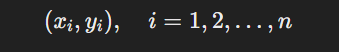


Here:
- \( x_i \): Independent variable(s).
- \( y_i \): Dependent variable.

For multiple features, \( x_i \) becomes a vector:

   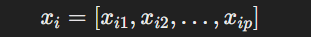\[

where \( p \) is the number of features.

The objective of linear regression is to model \( y \) as a linear combination of the predictors:

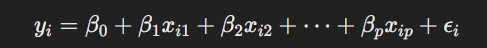


$\beta_0$: Intercept.

$\beta_1, \beta_2, \dots, \beta_p$: Coefficients of the independent variables ($x_1, x_2, \dots, x_p$).

$\epsilon$: Error term, capturing the unexplained variance

---

### 3. Mathematical Representation

#### 3.1. Hypothesis Function

The hypothesis function for linear regression is:

$$h_\theta(x) = \beta_0 + \sum_{j=1}^{p} \beta_j x_j$$

In matrix form, this can be compactly written as:

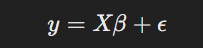

Where:
y:n×1 vector of target values.
𝑋
:

𝑛
×
(
𝑝
+
1
)
 design matrix, where the first column is all 1s (for the intercept term).
X:n×(p+1) design matrix, where the first column is all 1s (for the intercept term).

𝛽
:

(
𝑝
+
1
)
×
1
 vector of parameters.

β:(p+1)×1 vector of parameters.
𝜖
:

𝑛
×
1
 vector of error terms.

ϵ:n×1 vector of error terms.

#### 3.2. Loss Function (Sum of Squared Errors)

The loss function measures the discrepancy between the predicted values


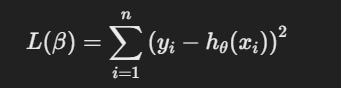




In matrix notation:

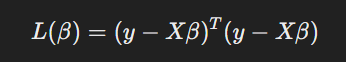


#### 3.3. Optimization (Least Squares Estimation)


To minimize the loss function, we differentiate \( L(\beta) \) with respect to \( \beta \) and set it to zero:


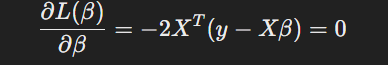


Solving for \( \beta \), we obtain:

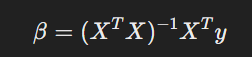




#### 3.4. Gradient Descent

In scenarios where \( X^T X \) is non-invertible or when the dataset is large, gradient descent is used:

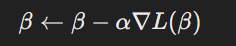


The gradient is:

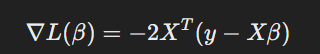


The update rule becomes:

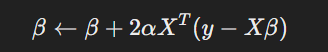


---

### 4. Assumptions of Linear Regression

Linear regression makes the following assumptions:
1. **Linearity**: The relationship between the predictors and the response is linear.
2. **Independence**: The residuals \( \epsilon_i \) are independent.
3. **Homoscedasticity**: The variance of the residuals is constant.
4. **Normality**: The residuals are normally distributed.

---

### 5. Evaluation Metrics

The performance of a linear regression model is evaluated using metrics such as:

#### Mean Squared Error (MSE)

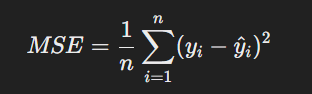


#### R-squared (\( R^2 \))

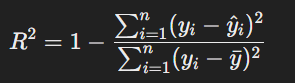


---

### 6. Mathematical Extensions

#### 6.1. Regularization

To prevent overfitting, regularization techniques add a penalty term to the loss function:

**Lasso Regression (L1 Regularization):**

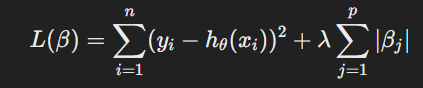


**Ridge Regression (L2 Regularization):**

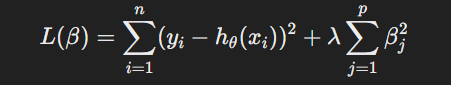


#### 6.2. Weighted Least Squares

When heteroscedasticity exists, weights are applied to minimize the variance:

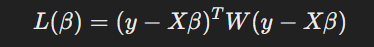


where \( W \) is a diagonal matrix of weights.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df.drop(columns=['Survived'])
y = df['Survived']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Show predictions
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


     Actual  Predicted
697       1   0.663772
426       1   0.812182
154       0   0.094846
293       0   0.665468
359       1   0.663859
..      ...        ...
753       0   0.104790
105       0   0.080803
772       0   0.762548
817       0   0.220474
80        0   0.168799

[150 rows x 2 columns]


**Linear regression aims to predict a continuous output based on a linear combination of the input features. In this case, the goal is to predict the survival probability, which is a continuous value between 0 and 1.**

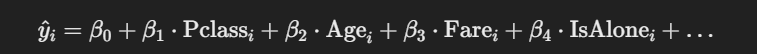

After the model is trained, it can predict the survival probability for new data points (test set). For each passenger in the test set, the model computes a predicted survival probability using the learned coefficients.

The predicted value for a new passenger is computed using the linear equation, which is essentially a weighted sum of the features, where each feature is multiplied by its corresponding learned coefficient.

For example, let's assume the model has learned the following coefficients after training:

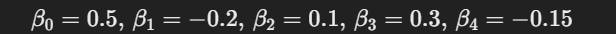

FoR Example:

For a new passenger with the following feature values:

Pclass = 1

Age = 25

Fare = 50

IsAlone = 0

The predicted survival probability
𝑦
^
  would be:

  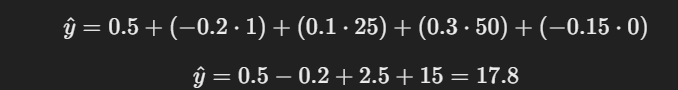


  **This is a predicted value for survival probability. However, as we are predicting a binary outcome (0 or 1), we generally threshold this predicted value at 0.5 to convert it into a binary class prediction.**

Since
𝑦
^
=
17.8

y
^
​
 =17.8 is greater than 0.5, we classify this passenger as Survived = 1.




# **While the process described above works, linear regression is not the ideal model for a binary classification problem due to several reasons:**

Continuous Predictions: Linear regression produces continuous values, which aren't inherently suited for binary outcomes.

Non-linearity: The relationship between features (like age, fare, sex) and the binary target variable (survival) is often non-linear, making linear regression inappropriate.

Predicted values can exceed bounds: The predicted values can go beyond the range [0, 1], which doesn’t make sense for probabilities.

Logistic Regression: Logistic regression would be more suitable for this type of problem, as it models the probability of an event occurring and ensures that the output stays within the range [0, 1].